# 垃圾邮件识别
# 1. 数据集介绍
**email**数据集(email.csv)整理自某邮箱账户2012年前3个月收到的所有邮件，邮件按是否为垃圾邮件进行标注，邮件内容也已进行预处理与特征提取。数据字段及具体含义如下：

- spam: Indicator for whether the email was spam.
- to_multiple: Indicator for whether the email was addressed to more than one recipient.
- from: Whether the message was listed as from anyone (this is usually set by default for regular outgoing email).
- cc: Number of people cc'ed.
- sent_email: Indicator for whether the sender had been sent an email in the last 30 days.
- time: Time at which email was sent.
- image: The number of images attached.
- attach: The number of attached files.
- dollar: The number of times a dollar sign or the word "dollar" appeared in the email.
- winner: Indicates whether "winner" appeared in the email.
- inherit: The number of times “inherit” (or an extension, such as “inheritance”) appeared in the email.
- viagra: The number of times “viagra” appeared in the email.
- password: The number of times “password” appeared in the email.
- num_char: The number of characters in the email, in thousands.
- line_breaks: The number of line breaks in the email (does not count text wrapping).
- format: Indicates whether the email was written using HTML (e.g. may have included bolding or active links).
- re_subj: Whether the subject started with "Re:", "RE:", "re:", or "rE:"
- exclaim_subj: Whether there was an exclamation point in the subject.
- urgent_subj: Whether the word “urgent” was in the email subject.
- exclaim_mess: The number of exclamation points in the email message.
- number: Factor variable saying whether there was no number, a small number (under 1 million), or a big number.

# 2. 数据探索分析与预处理

In [1]:
## load required libraries 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import warnings
warnings.simplefilter("ignore")

## 2.1. 导入数据

In [2]:
data = pd.read_csv("./email.csv")
data.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,no,yes,no,no,no,no,no,no,no,no,11.370,202,HTML,no,no,no,0,big
1,0,no,yes,no,no,no,no,no,no,no,no,10.504,202,HTML,no,no,no,1,small
2,0,no,yes,no,no,no,no,yes,no,yes,no,7.773,192,HTML,no,no,no,6,small
3,0,no,yes,no,no,no,no,no,no,no,no,13.256,255,HTML,no,no,no,48,small
4,0,no,yes,no,no,no,no,no,no,no,yes,1.231,29,Plain,no,no,no,1,none


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3921 entries, 0 to 3920
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   spam          3921 non-null   int64  
 1   to_multiple   3921 non-null   object 
 2   from          3921 non-null   object 
 3   cc            3921 non-null   object 
 4   sent_email    3921 non-null   object 
 5   image         3921 non-null   object 
 6   attach        3921 non-null   object 
 7   dollar        3921 non-null   object 
 8   winner        3921 non-null   object 
 9   inherit       3921 non-null   object 
 10  password      3921 non-null   object 
 11  num_char      3921 non-null   float64
 12  line_breaks   3921 non-null   int64  
 13  format        3921 non-null   object 
 14  re_subj       3921 non-null   object 
 15  exclaim_subj  3921 non-null   object 
 16  urgent_subj   3921 non-null   object 
 17  exclaim_mess  3921 non-null   int64  
 18  number        3921 non-null 

## 2.2. 数据预处理
### 类别型变量 => 数值型变量

比如将二分类变量映射为1/0，例如yes/no

In [4]:
yes_no_map = {
    'yes': 1,
    'no': 0
}
data['to_multiple'] = data['to_multiple'].map(yes_no_map)
data['from'] = data['from'].map(yes_no_map)
data['cc'] = data['cc'].map(yes_no_map)
data['sent_email'] = data['sent_email'].map(yes_no_map)
data['image'] = data['image'].map(yes_no_map)
data['attach'] = data['attach'].map(yes_no_map)
data['dollar'] = data['dollar'].map(yes_no_map)
data['winner'] = data['winner'].map(yes_no_map)
data['inherit'] = data['inherit'].map(yes_no_map)
data['password'] = data['password'].map(yes_no_map)
data['re_subj'] = data['re_subj'].map(yes_no_map)
data['exclaim_subj'] = data['exclaim_subj'].map(yes_no_map)
data['urgent_subj'] = data['urgent_subj'].map(yes_no_map)

In [5]:
# format
data['format'].value_counts()

HTML     2726
Plain    1195
Name: format, dtype: int64

In [6]:
format_map = {
    'HTML': 1,
    'Plain': 0
}
data['format'] = data['format'].map(format_map)

In [7]:
# number
data['number'].value_counts()

small    2827
none      549
big       545
Name: number, dtype: int64

使用哑变量表示多类别变量

In [8]:
data = data.join(pd.get_dummies(data['number'], prefix = 'number'))
data = data.drop(['number'], axis = 1)
data.head()

,spam,to_multiple,from,cc,sent_email,image,attach,dollar,winner,inherit,...,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number_big,number_none,number_small
0,0,0,1,0,0,0,0,0,0,0,...,11.370,202,1,0,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,...,10.504,202,1,0,0,0,1,0,0,1
2,0,0,1,0,0,0,0,1,0,1,...,7.773,192,1,0,0,0,6,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,13.256,255,1,0,0,0,48,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,1.231,29,0,0,0,0,1,0,1,0


## 2.3. 数据探索性分析
### 因变量: 分布情况

[0 1]
spam
0    3554
1     367
Name: cc, dtype: int64


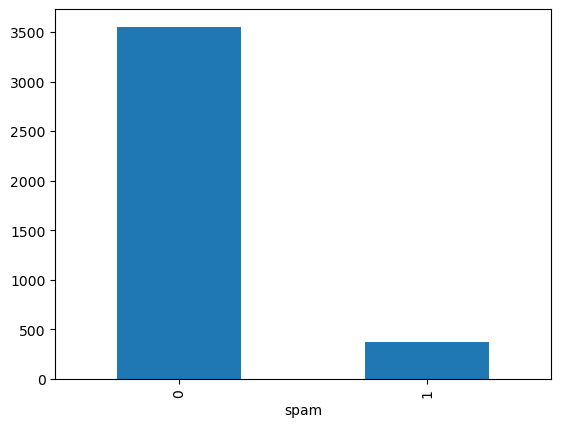

In [9]:
print(data['spam'].unique())
data_label_count = data.groupby('spam').count()['cc'].sort_values(ascending = False)
print(data_label_count)
data_label_count.plot.bar()
plt.show()

### 自变量: 分布情况 & 相关性分析

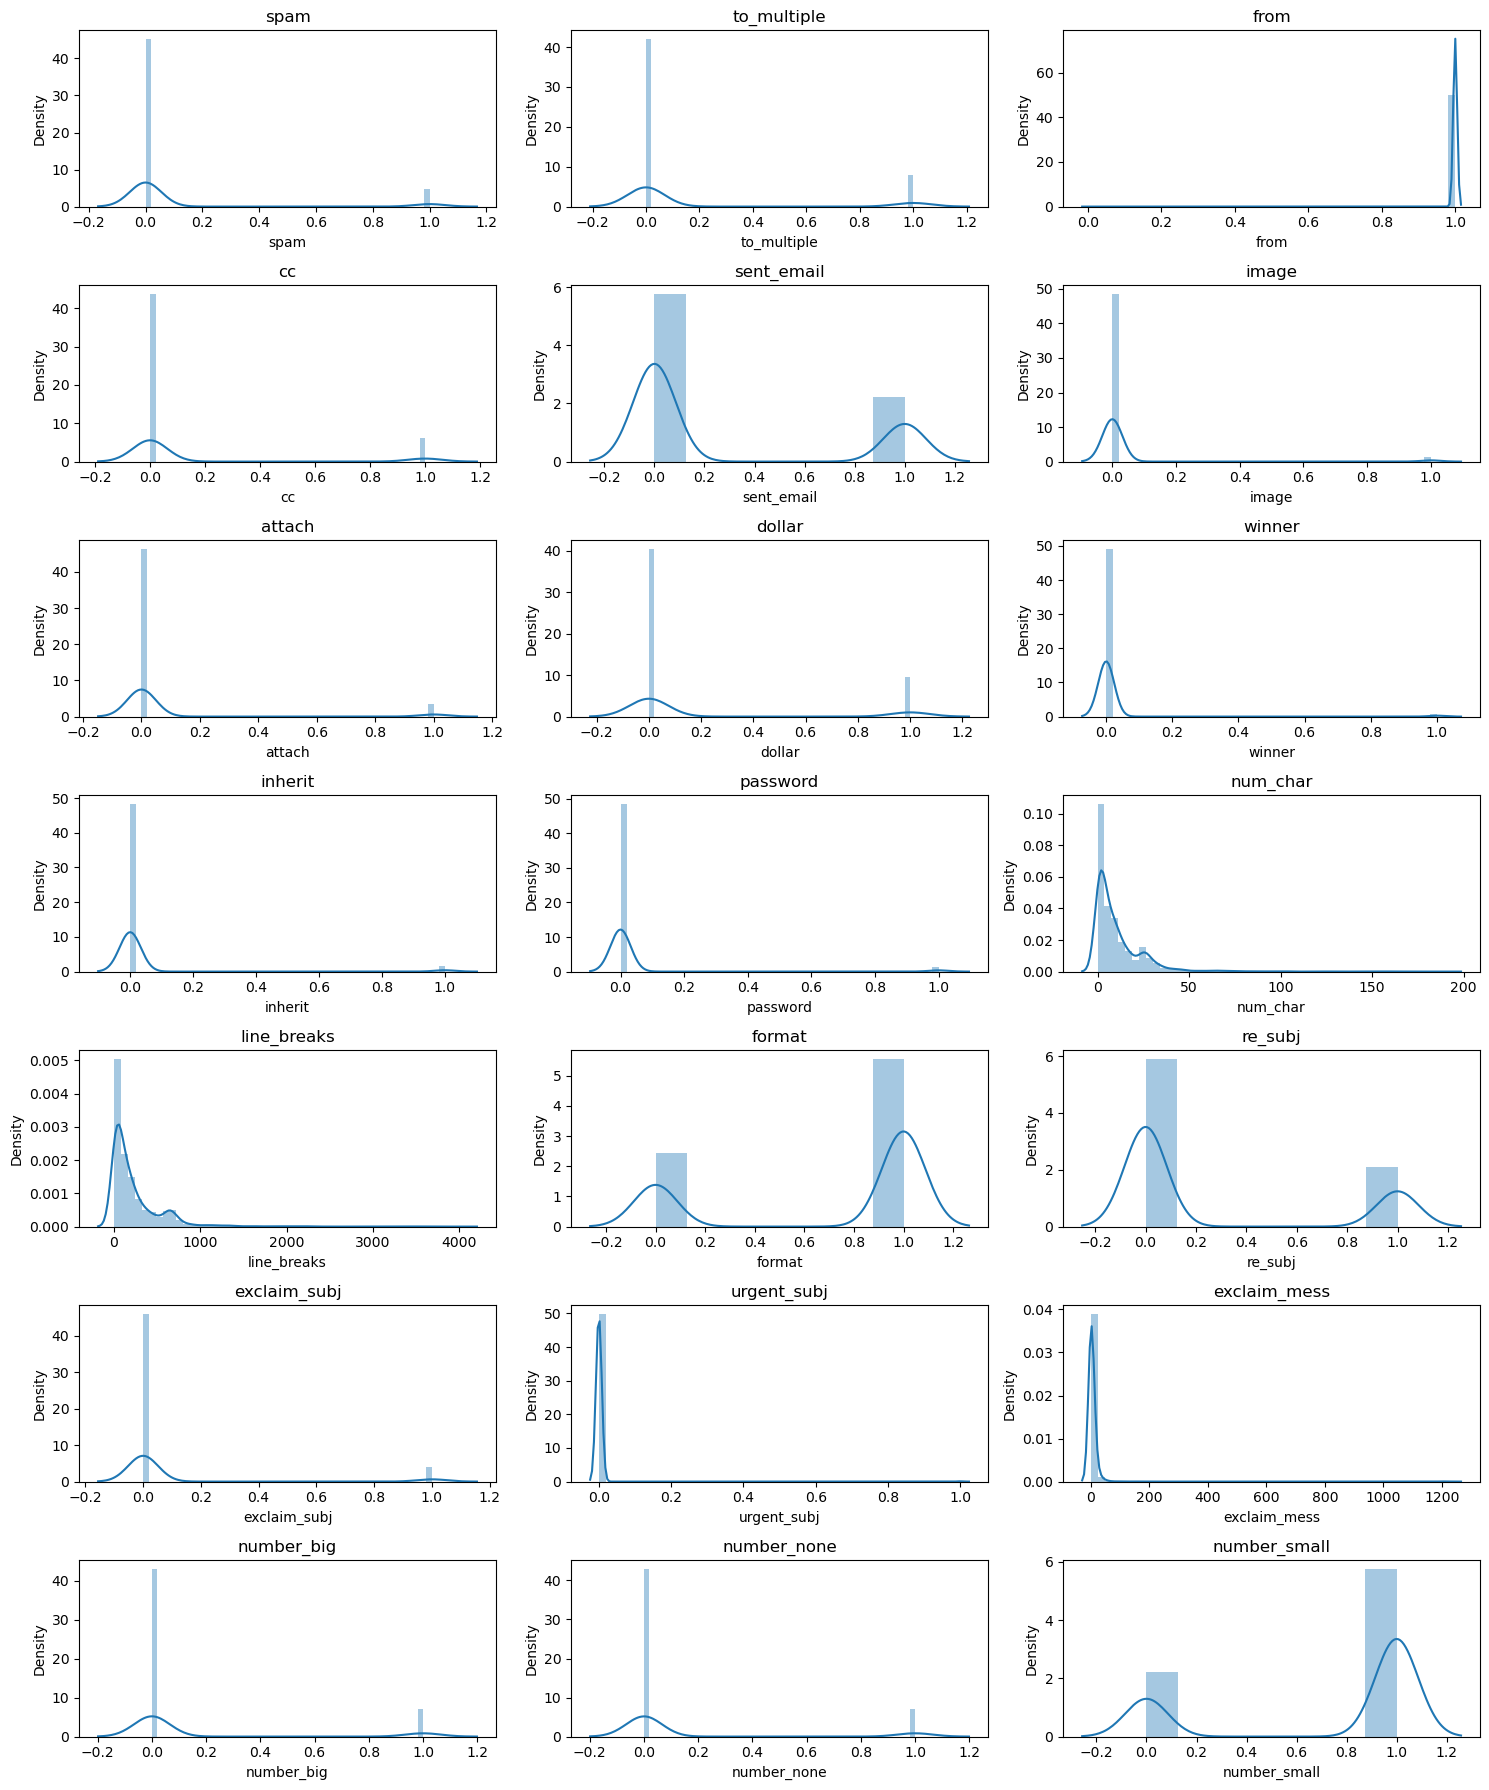

In [10]:
import seaborn as sns
graph_by_variables = data.columns
plt.figure(figsize = (15, 18))
for i in range(0, 21):
    plt.subplot(7, 3, i+1)
    sns.distplot(data[graph_by_variables[i]])
    plt.title(graph_by_variables[i])
plt.tight_layout()

<Axes: >

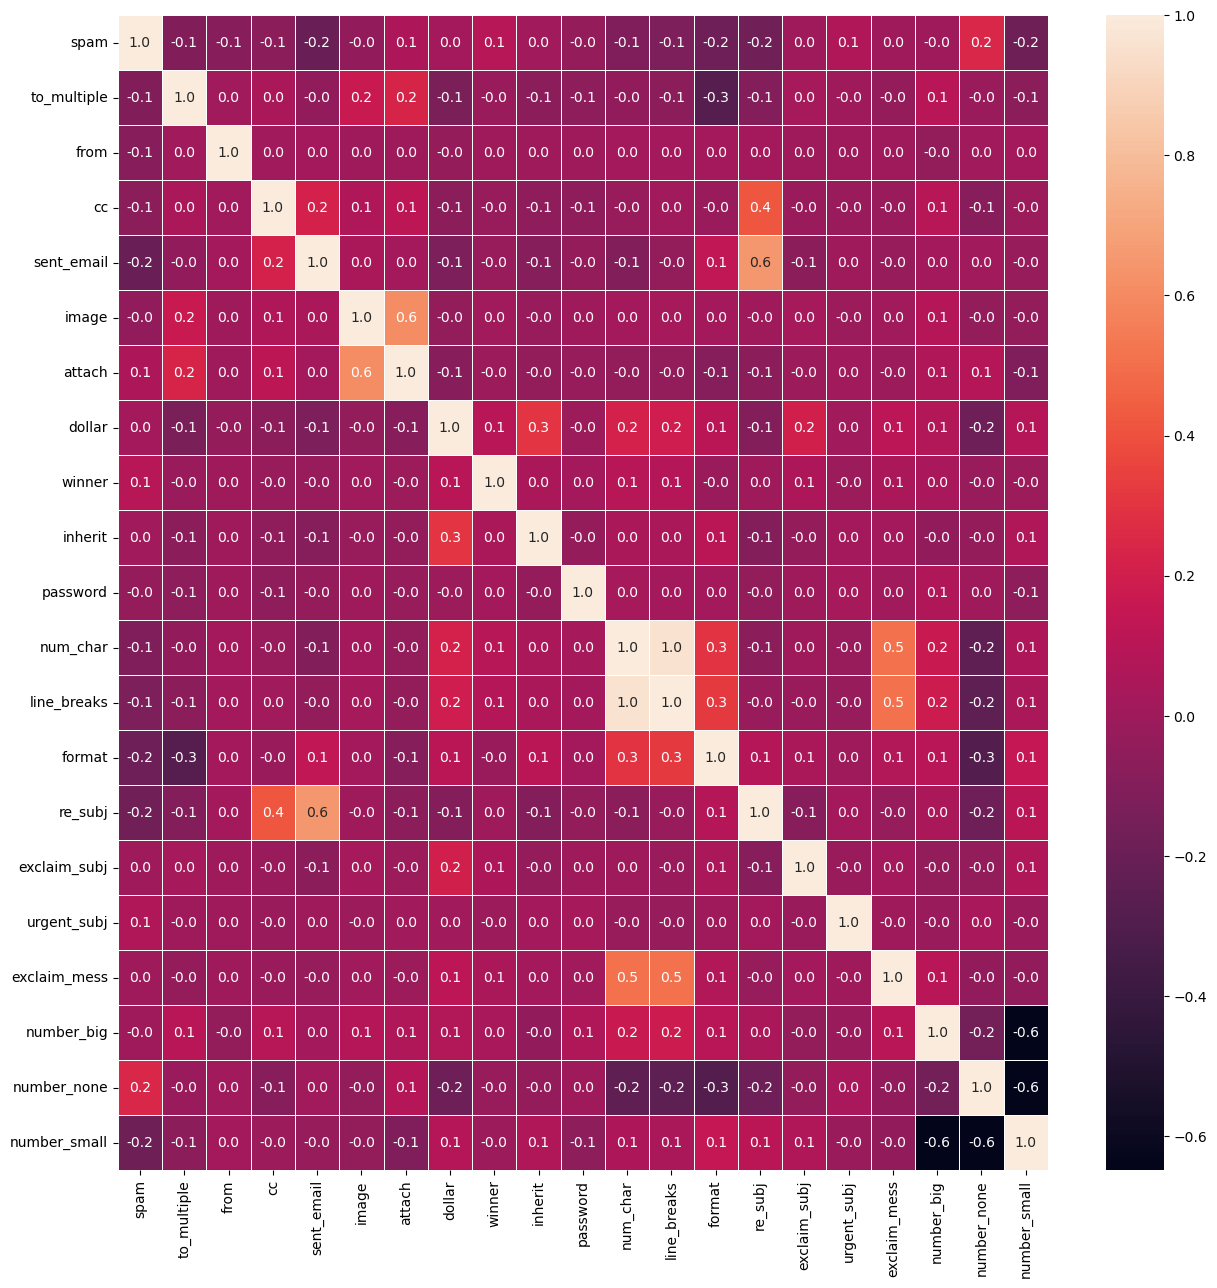

In [11]:
f, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(data.corr(), annot = True, linewidths = 0.5, fmt = '.1f', ax = ax)

## 2.4. 数据集划分

In [12]:
from sklearn.model_selection import train_test_split
# Splitting into train and test sets
X = data.drop(['spam'], axis = 1)
y = data['spam']
# test_size = 0.2意为训练集占80%，测试集占20%，即将数据集按4:1的比例划分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 628)
print(len(X_train), len(X_test))

3136 785


# 3. 垃圾邮件识别
## 3.1. 逻辑回归
### 模型构建

In [13]:
from sklearn.linear_model import LogisticRegression
# Fitting a logistic regression model with default parameters
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

#### 可选参数
class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

具体见https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

### 效果评价

In [14]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [15]:
# Prediction & Evaluation
print("Logistic regression score for test set:")
# Precision, Recall, F1-score
y_hat_test = logreg.predict(X_test)
print("Precision: {:.3f}".format(precision_score(y_test, y_hat_test)), "Recall: {:.3f}".format(recall_score(y_test, y_hat_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_hat_test)))
# AUC
y_hat_test = logreg.predict_proba(X_test)
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_hat_test[:,1])))

Logistic regression score for test set:
Precision: 0.667 Recall: 0.116
F1 score: 0.198
AUC score: 0.875


### 解决样本不平衡

In [16]:
logreg = LogisticRegression(class_weight = 'balanced')
logreg.fit(X_train, y_train)
# Prediction & Evaluation
print("Logistic regression score for test set:")
# Precision, Recall, F1-score
y_hat_test = logreg.predict(X_test)
print("Precision: {:.3f}".format(precision_score(y_test, y_hat_test)), "Recall: {:.3f}".format(recall_score(y_test, y_hat_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_hat_test)))
# AUC
y_hat_test = logreg.predict_proba(X_test)
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_hat_test[:,1])))

Logistic regression score for test set:
Precision: 0.266 Recall: 0.884
F1 score: 0.409
AUC score: 0.876


## 3.2. 朴素贝叶斯
### 模型构建

In [17]:
from sklearn.naive_bayes import BernoulliNB
# Fitting a Naive Bayes model with default parameters
clf = BernoulliNB()
clf.fit(X_train, y_train)

BernoulliNB()

#### 可选参数
class sklearn.naive_bayes.BernoulliNB(*, alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)

具体见https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html

### 效果评价

In [18]:
# Prediction & Evaluation
print("Naive Bayes score for test set:")
# Precision, Recall, F1-score
y_hat_test = clf.predict(X_test)
print("Precision: {:.3f}".format(precision_score(y_test, y_hat_test)), "Recall: {:.3f}".format(recall_score(y_test, y_hat_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_hat_test)))
# AUC
y_hat_test = clf.predict_proba(X_test)
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_hat_test[:,1])))

Naive Bayes score for test set:
Precision: 0.500 Recall: 0.377
F1 score: 0.430
AUC score: 0.851


## 3.3. 决策树模型
### 模型构建

In [19]:
from sklearn.tree import DecisionTreeClassifier
# Fitting a decision tree model with default parameters
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

#### 可选参数
class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)

具体见https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### 效果评价

In [20]:
# Prediction & Evaluation
print("Decision tree score for test set:")
# Precision, Recall, F1-score
y_hat_test = dt.predict(X_test)
print("Precision: {:.3f}".format(precision_score(y_test, y_hat_test)), "Recall: {:.3f}".format(recall_score(y_test, y_hat_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_hat_test)))
# AUC
y_hat_test = dt.predict_proba(X_test)
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_hat_test[:,1])))

Decision tree score for test set:
Precision: 0.632 Recall: 0.696
F1 score: 0.662
AUC score: 0.863


### 可视化

[Text(0.598977947566628, 0.98, 'line_breaks <= 46.5\ngini = 0.172\nsamples = 3136\nvalue = [2838, 298]'),
 Text(0.275981315179606, 0.94, 'sent_email <= 0.5\ngini = 0.334\nsamples = 952\nvalue = [750, 202]'),
 Text(0.27134632097334876, 0.9, 'num_char <= 0.538\ngini = 0.419\nsamples = 677\nvalue = [475, 202]'),
 Text(0.15755359212050984, 0.86, 'to_multiple <= 0.5\ngini = 0.498\nsamples = 163\nvalue = [77, 86]'),
 Text(0.14477114716106604, 0.82, 're_subj <= 0.5\ngini = 0.486\nsamples = 137\nvalue = [57, 80]'),
 Text(0.1401361529548088, 0.78, 'format <= 0.5\ngini = 0.475\nsamples = 131\nvalue = [51, 80]'),
 Text(0.11920625724217845, 0.74, 'attach <= 0.5\ngini = 0.494\nsamples = 110\nvalue = [49, 61]'),
 Text(0.10052143684820394, 0.7, 'number_big <= 0.5\ngini = 0.498\nsamples = 83\nvalue = [44, 39]'),
 Text(0.07705677867902665, 0.66, 'line_breaks <= 11.5\ngini = 0.481\nsamples = 72\nvalue = [43, 29]'),
 Text(0.05330243337195829, 0.62, 'num_char <= 0.399\ngini = 0.471\nsamples = 29\nvalue = 

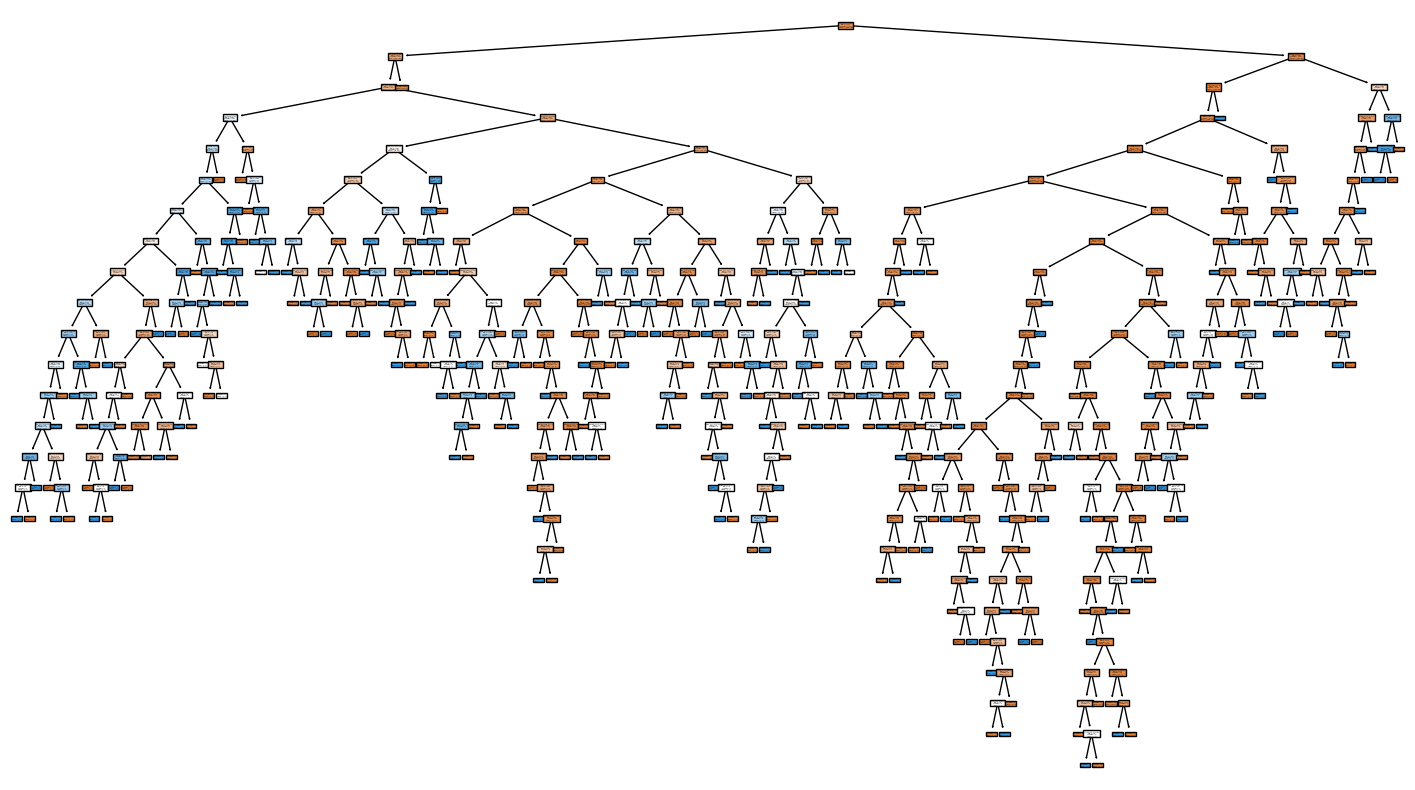

In [21]:
from sklearn import tree
import matplotlib.pyplot as plt 
plt.figure(figsize = (18, 10))
tree.plot_tree(dt, feature_names = X_train.columns, filled = True)

### 防止过拟合

In [23]:
from sklearn.tree import DecisionTreeClassifier
# Fitting a decision tree model with default parameters
dt = DecisionTreeClassifier(max_depth = 4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [24]:
# Prediction & Evaluation
print("Decision tree score for test set:")
# Precision, Recall, F1-score
y_hat_test = dt.predict(X_test)
print("Precision: {:.3f}".format(precision_score(y_test, y_hat_test)), "Recall: {:.3f}".format(recall_score(y_test, y_hat_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_hat_test)))
# AUC
y_hat_test = dt.predict_proba(X_test)
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_hat_test[:,1])))

Decision tree score for test set:
Precision: 0.649 Recall: 0.348
F1 score: 0.453
AUC score: 0.907


[Text(0.4625, 0.9, 'line_breaks <= 46.5\ngini = 0.172\nsamples = 3136\nvalue = [2838, 298]'),
 Text(0.25, 0.7, 'sent_email <= 0.5\ngini = 0.334\nsamples = 952\nvalue = [750, 202]'),
 Text(0.2, 0.5, 'num_char <= 0.538\ngini = 0.419\nsamples = 677\nvalue = [475, 202]'),
 Text(0.1, 0.3, 'to_multiple <= 0.5\ngini = 0.498\nsamples = 163\nvalue = [77, 86]'),
 Text(0.05, 0.1, 'gini = 0.486\nsamples = 137\nvalue = [57, 80]'),
 Text(0.15, 0.1, 'gini = 0.355\nsamples = 26\nvalue = [20, 6]'),
 Text(0.3, 0.3, 'line_breaks <= 15.5\ngini = 0.349\nsamples = 514\nvalue = [398, 116]'),
 Text(0.25, 0.1, 'gini = 0.499\nsamples = 67\nvalue = [35, 32]'),
 Text(0.35, 0.1, 'gini = 0.305\nsamples = 447\nvalue = [363, 84]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 275\nvalue = [275, 0]'),
 Text(0.675, 0.7, 'number_none <= 0.5\ngini = 0.084\nsamples = 2184\nvalue = [2088, 96]'),
 Text(0.55, 0.5, 'urgent_subj <= 0.5\ngini = 0.061\nsamples = 2113\nvalue = [2046, 67]'),
 Text(0.5, 0.3, 'winner <= 0.5\ngini = 0.06\n

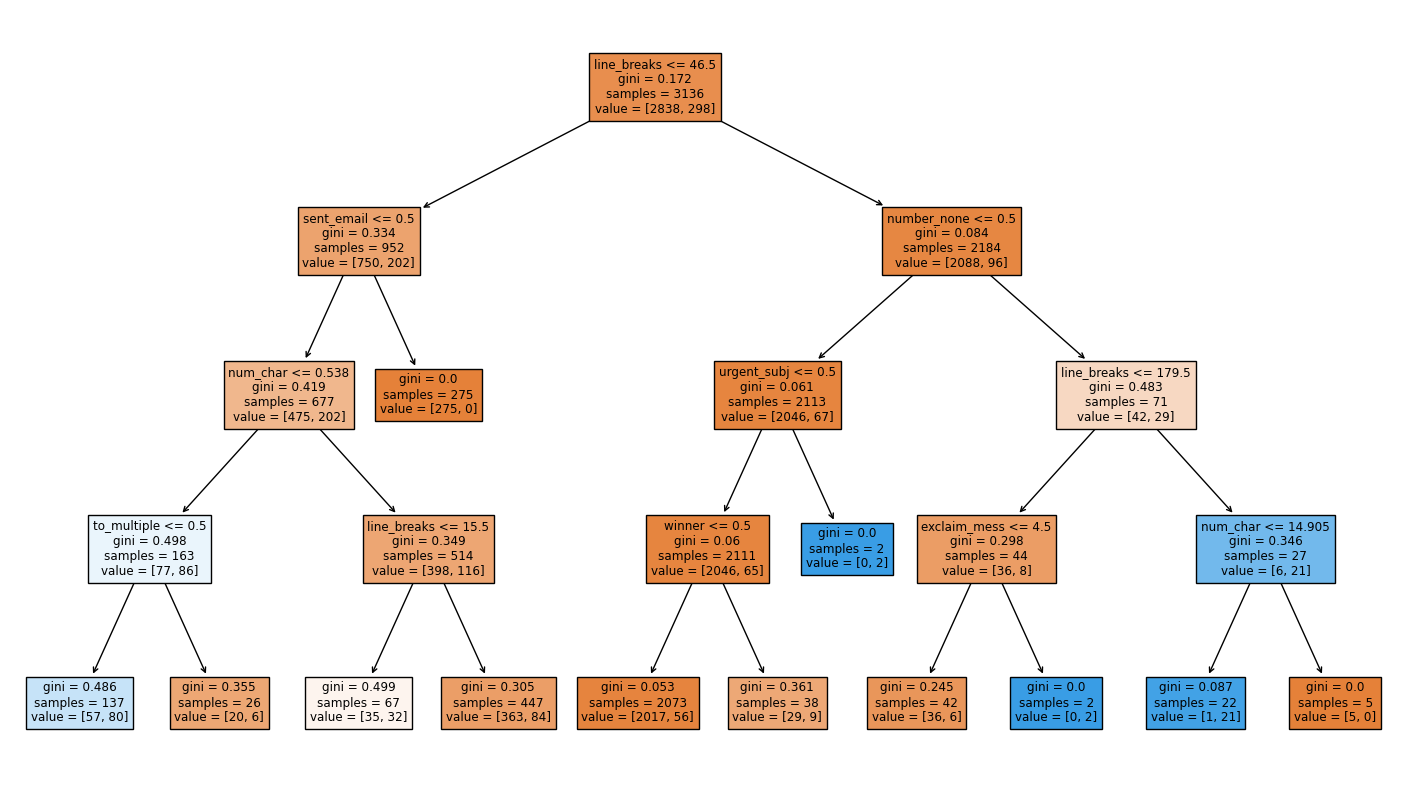

In [25]:
from sklearn import tree
import matplotlib.pyplot as plt 
plt.figure(figsize = (18, 10))
tree.plot_tree(dt, feature_names = X_train.columns, filled = True)

### 参数选择

In [26]:
from sklearn.tree import DecisionTreeClassifier
# Fitting a decision tree model with default parameters
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [27]:
# Prediction & Evaluation
print("Decision tree score for test set:")
# Precision, Recall, F1-score
y_hat_test = dt.predict(X_test)
print("Precision: {:.3f}".format(precision_score(y_test, y_hat_test)), "Recall: {:.3f}".format(recall_score(y_test, y_hat_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_hat_test)))
# AUC
y_hat_test = dt.predict_proba(X_test)
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_hat_test[:,1])))

Decision tree score for test set:
Precision: 0.574 Recall: 0.391
F1 score: 0.466
AUC score: 0.871


In [28]:
from sklearn.tree import DecisionTreeClassifier
# Fitting a decision tree model with default parameters
dt = DecisionTreeClassifier(max_depth = 5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [29]:
# Prediction & Evaluation
print("Decision tree score for test set:")
# Precision, Recall, F1-score
y_hat_test = dt.predict(X_test)
print("Precision: {:.3f}".format(precision_score(y_test, y_hat_test)), "Recall: {:.3f}".format(recall_score(y_test, y_hat_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, y_hat_test)))
# AUC
y_hat_test = dt.predict_proba(X_test)
print("AUC score: {:.3f}".format(roc_auc_score(y_test, y_hat_test[:,1])))

Decision tree score for test set:
Precision: 0.688 Recall: 0.478
F1 score: 0.564
AUC score: 0.896
